<a href="https://colab.research.google.com/github/michellamello/mackenzie/blob/main/plpcd4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trilha 4 - Paradigmas de linguagens de programação em ciência de dados

Estudo de caso 2 - *Análise de vinhos no mundo*

Importação de bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

%matplotlib inline

Lê arquivo de dados, exibe shape para confirmação de linhas e colunas e head para verificação dos dados

In [ ]:
wine = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/winemag-data-130k-v2.csv')

display(wine.shape)
display(wine.head())

(129971, 14)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Demonstra top 10 em quantidade de vinhos registrados, em seguida o percentual de vinhos nacionais e por fim, o percentual de dados vazios por campo

In [ ]:
display(wine.country.value_counts()[:10])

print('Percentual de vinhos nacionais: ', wine[wine.country == 'Brazil'].country.count() / len(wine))

display(wine.isnull().sum() / len(wine))

US           54504
France       22093
Italy        19540
Spain         6645
Portugal      5691
Chile         4472
Argentina     3800
Austria       3345
Australia     2329
Germany       2165
Name: country, dtype: int64

Percentual de vinhos nacionais:  0.00040008925067899764


Unnamed: 0               0.000000
country                  0.000485
description              0.000000
designation              0.288257
points                   0.000000
price                    0.069215
province                 0.000485
region_1                 0.163475
region_2                 0.611367
taster_name              0.201922
taster_twitter_handle    0.240154
title                    0.000000
variety                  0.000008
winery                   0.000000
dtype: float64

Plota gŕafico de barras com quantidade de vinhos por país

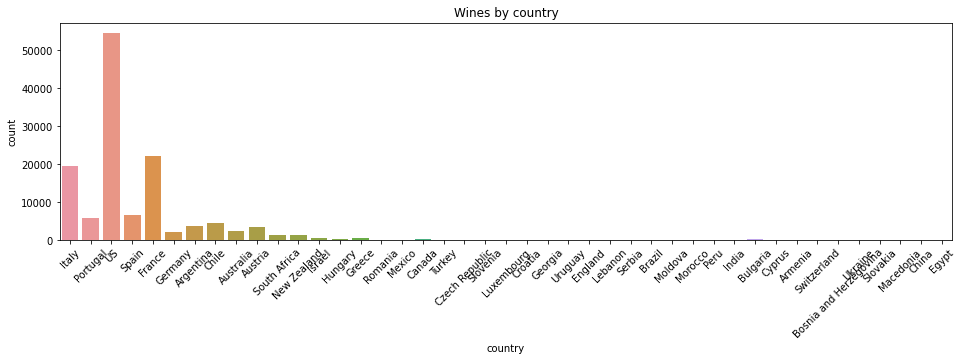

In [ ]:
plt.figure(figsize=(16,4))
sns.countplot(x=wine.country)
plt.title('Wines by country')
plt.xticks(rotation=45)
plt.show()

Cria DataFrame com quantidade de vinhos do vigésimo terceiro ao vigésimo nono para obter a posição do Brasil

In [ ]:
pd.DataFrame(wine.country.value_counts()).reset_index()[23:30]

,index,country
23,Croatia,73
24,Mexico,70
25,Moldova,59
26,Brazil,52
27,Lebanon,35
28,Morocco,28
29,Peru,16


Utilizando a função nlargest, obtém os 5 vinhos com os maiores preços

In [ ]:
wine.loc[wine.price.nlargest(5).index][['country', 'title', 'variety', 'price']]



,country,title,variety,price
80290,France,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,3300.0
15840,France,Château Pétrus 2014 Pomerol,Bordeaux-style Red Blend,2500.0
98380,France,Domaine du Comte Liger-Belair 2010 La Romanée,Pinot Noir,2500.0
120391,US,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,Chardonnay,2013.0
65352,France,Château Pétrus 2011 Pomerol,Bordeaux-style Red Blend,2000.0


Utilizando a função nsmallest, obtém os 5 vinhos com os menores preços

In [ ]:
wine.loc[wine.price.nsmallest(5).index][['country', 'title', 'variety', 'price']]

,country,title,variety,price
1987,Spain,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,4.0
20484,US,Dancing Coyote 2015 White (Clarksburg),White Blend,4.0
29553,Argentina,Broke Ass 2009 Red Malbec-Syrah (Mendoza),Malbec-Syrah,4.0
31530,US,Bandit NV Chardonnay (California),Chardonnay,4.0
59507,US,Pam's Cuties NV Unoaked Chardonnay (California),Chardonnay,4.0


Retira preços vazios e exibe boxplot com comparação de preços entre Brasil e o restante do mundo. O gráfico demonstra a presença de outliers

([<matplotlib.axis.XTick at 0x7faa54fa6090>,
 [Text(0, 0, 'Brazil'), Text(0, 0, 'World')])

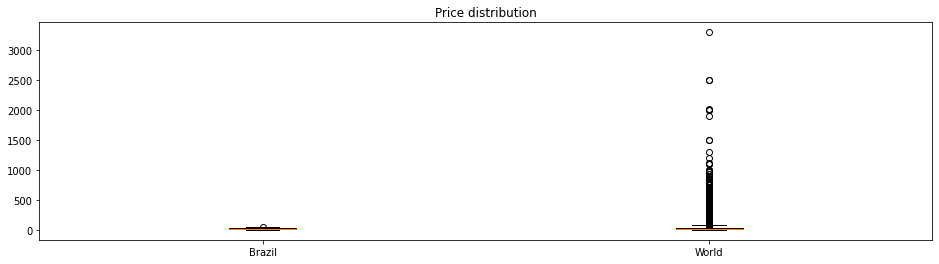

In [ ]:
wine_not_null = wine[ ~ np.isnan(wine.price)]

plt.figure(figsize=(16,4))
plt.boxplot(wine_not_null[wine_not_null.country == 'Brazil'].price, positions=[1])
plt.boxplot(wine_not_null.price, positions=[2])
plt.title('Price distribution')
plt.xticks(ticks=[1,2], labels=['Brazil', 'World'])
plt.show()

Melhora a visualização gráfica

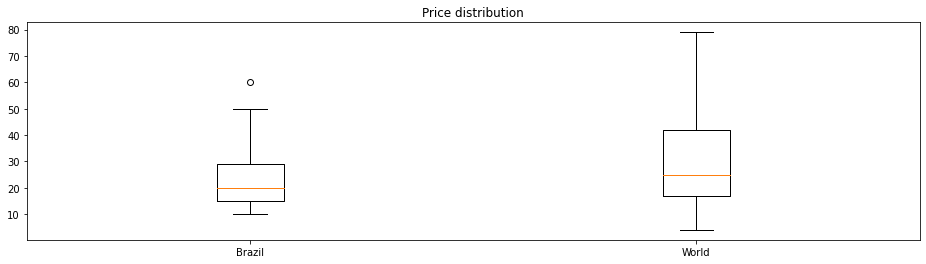

In [ ]:
plt.figure(figsize=(16,4))
plt.boxplot(wine_not_null[wine_not_null.country == 'Brazil'].price, positions=[1])
plt.boxplot(wine_not_null.price, positions=[2], showfliers=False)
plt.title('Price distribution')
plt.xticks(ticks=[1,2], labels=['Brazil', 'World'])
plt.show()

Busca região dos vinhos brasileiros avaiados

In [ ]:
wine[wine.country == 'Brazil'].province.unique()

array(['Pinto Bandeira', 'Santa Catarina', 'Campanha', 'Serra Gaúcha',
       'Vale dos Vinhedos', 'Brazil', 'Vale Trentino', 'Serra do Sudeste'],
      dtype=object)

Agrupa os vinhos brasileiros por região e conta as ocorrências

In [ ]:
wine[wine.country == 'Brazil'].groupby('province').province.count()

province
Brazil                7
Campanha              4
Pinto Bandeira        6
Santa Catarina        2
Serra Gaúcha         18
Serra do Sudeste      1
Vale Trentino         5
Vale dos Vinhedos     9
Name: province, dtype: int64

Plota gráfico de barras com valores médios por região e linha com média geral dos vinhos avaliados

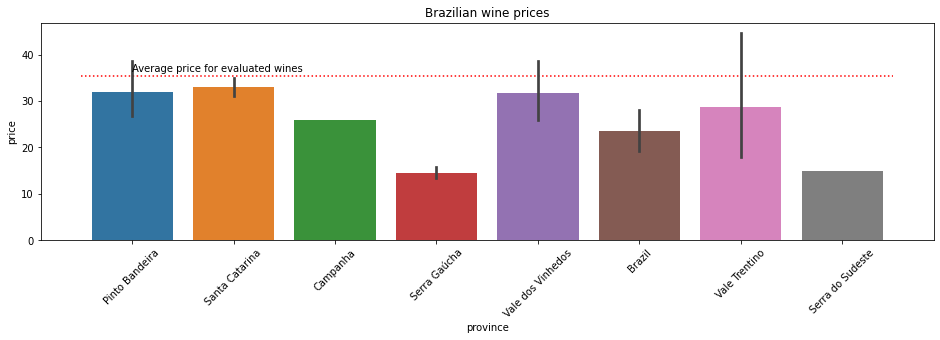

In [ ]:
plt.figure(figsize=(16,4))
sns.barplot(x=wine[wine.country =='Brazil'].province, y=wine[wine.country == 'Brazil'].price)
plt.title('Brazilian wine prices')
plt.hlines(wine.price.mean(), -0.5, 7.5, color='r', linestyles=':')
plt.text(0, wine.price.mean() + 1, 'Average price for evaluated wines')
plt.xticks(rotation=45)
plt.show()

Compara pontuação de vinhos nacionais por região com vinhos importados

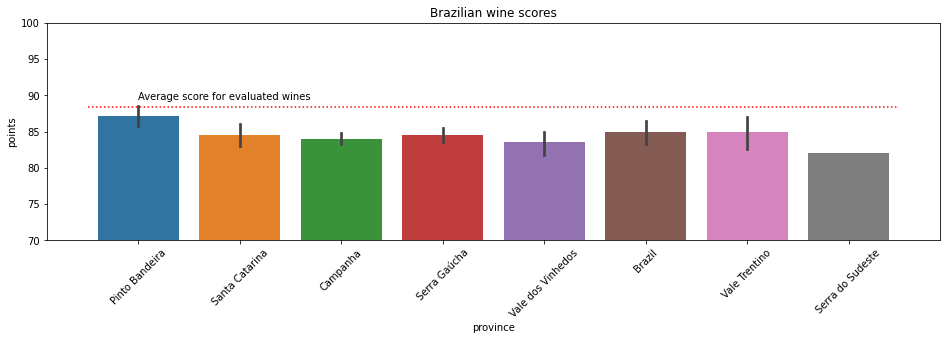

In [ ]:
plt.figure(figsize=(16,4))
sns.barplot(x=wine[wine.country == 'Brazil'].province, y=wine[wine.country == 'Brazil'].points)
plt.title('Brazilian wine scores')
plt.hlines(wine.points.mean(), -0.5, 7.5, color='r', linestyles=':')
plt.text(0, wine.points.mean() + 1, 'Average score for evaluated wines')
plt.xticks(rotation=45)
plt.ylim([70,100])
plt.show()

Exibe gráfico em barra com a relação entre pontuação e preços

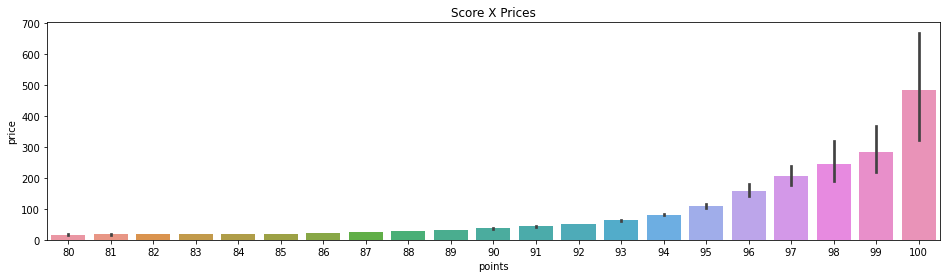

In [ ]:
plt.figure(figsize=(16,4))
sns.barplot(x=wine.points, y=wine.price)
plt.title('Score X Prices')
plt.show()

Exibe gráfico em barra com relação entre países e preços

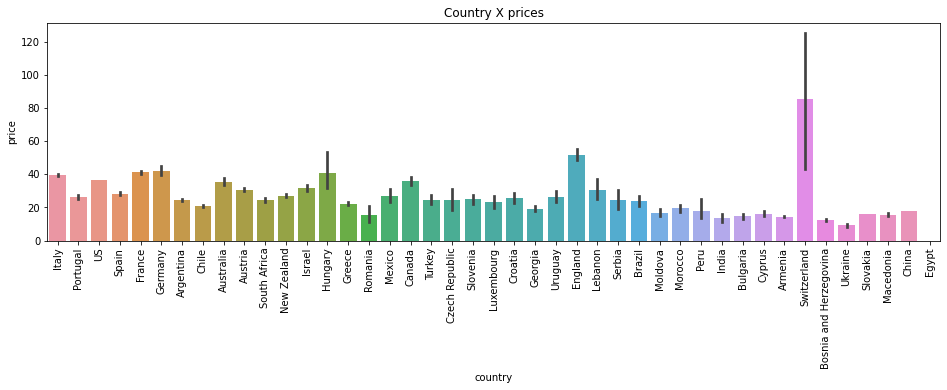

In [ ]:
plt.figure(figsize=(16,4))
sns.barplot(x=wine.country, y=wine.price)
plt.title('Country X prices')
plt.xticks(rotation=90)
plt.show()

Exbe gráfico em barra com relação entre países e pontuação, com esta iniciando em 70 para evitar distorção

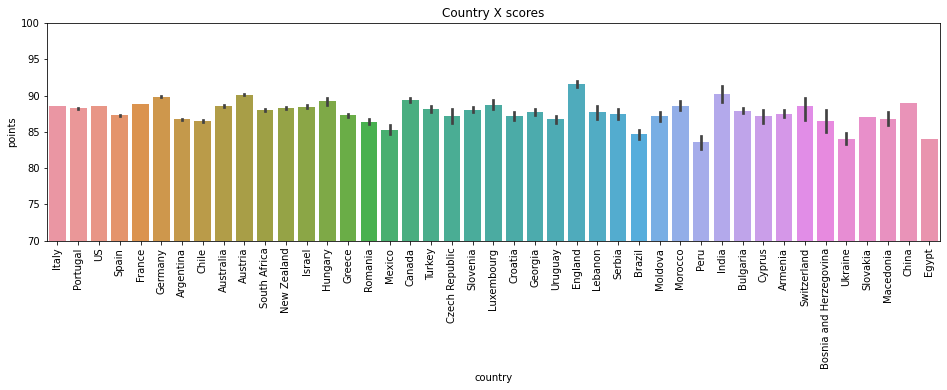

In [ ]:
plt.figure(figsize=(16,4))
sns.barplot(x=wine.country, y=wine.points)
plt.title('Country X scores')
plt.xticks(rotation=90)
plt.ylim([70,100])
plt.show()

Exibe gráfico com vinhos com valores abaixo de 50 e notas acima da média

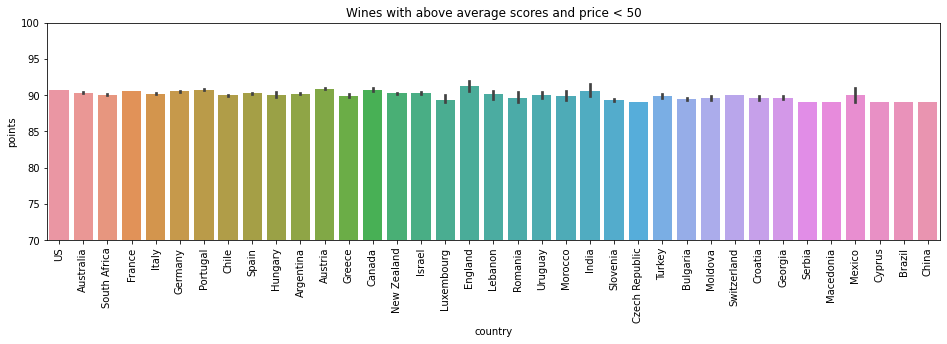

In [ ]:
plt.figure(figsize=(16,4))
sns.barplot(x='country', y='points', data=wine[(wine.price < 50) & (wine.points > wine.points.mean())])
plt.title('Wines with above average scores and price < 50')
plt.xticks(rotation=90)
plt.ylim([70, 100])
plt.show()
